# Exercício 3

Obtenha as séries de preços de Banco Itaú PN (ITUB4.SA), VALE (VALE3.SA), da WEG (WEGE3.SA), da B3 (B3SA3.SA), para o período de 2015-01-01 a 2020-01-01 (5 anos de dados). Estas séries possuem valores faltantes, é necessário fazer o tratamento. Para cada uma destas séries faça:
1. Limpeza dos dados faltantes
1. Cálculo da série de preços mensais
1. Cálculo do log-retorno mensal
1. Cálculo do retorno esperado e volatilidade mensal
1. Cálculo do retorno esperado e volatilidade anualizados

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf

In [26]:
symbol = 'ITUB4.SA VALE3.SA B3SA3.SA WEGE3.SA'

In [27]:
data = yf.download(symbol, start='2014-12-30', end='2020-01-01')

[*********************100%***********************]  4 of 4 completed


## Limpeza dos dados faltantes

In [28]:
data['Adj Close'].shape

(1242, 4)

In [29]:
data['Adj Close'].dropna().shape

(1242, 4)

In [30]:
p = data['Adj Close'].dropna()

In [31]:
p.head()

,B3SA3.SA,ITUB4.SA,VALE3.SA,WEGE3.SA
Date,,,,
2014-12-30,7.959536,14.352860,17.784248,10.522178
2015-01-02,7.692603,14.039539,17.272884,10.625674
2015-01-05,7.482286,14.110084,17.013140,10.698119
2015-01-06,7.555089,14.338338,17.694962,10.539428
2015-01-07,7.854380,14.857093,18.344318,10.418679


## Cálculo da série de preços mensais

In [32]:
p_monthly = p.resample('1M').last()

In [33]:
p_monthly.head()

,B3SA3.SA,ITUB4.SA,VALE3.SA,WEGE3.SA
Date,,,,
2014-12-31,7.959536,14.352860,17.784248,10.522178
2015-01-31,7.441843,13.653583,15.105658,11.067260
2015-02-28,8.153672,15.530207,17.248533,10.617612
2015-03-31,8.994921,15.030057,14.561820,11.071282
2015-04-30,10.146810,16.407654,18.994514,11.168765


## Cálculo do log-retorno mensal

In [45]:
r_monthly = np.log(p_monthly).diff()

## Cálculo do retorno esperado e volatilidade mensal

### Retorno esperado

In [46]:
r_monthly.mean()

B3SA3.SA    0.027405
ITUB4.SA    0.015367
VALE3.SA    0.017611
WEGE3.SA    0.019735
dtype: float64

### Volatilidade

In [47]:
r_monthly.std()

B3SA3.SA    0.082739
ITUB4.SA    0.077436
VALE3.SA    0.128637
WEGE3.SA    0.067656
dtype: float64

## Cálculo do retorno esperado e volatilidade anualizados

### Retorno esperado anualizado

In [48]:
r_monthly.mean() * 12

B3SA3.SA    0.328865
ITUB4.SA    0.184406
VALE3.SA    0.211334
WEGE3.SA    0.236816
dtype: float64

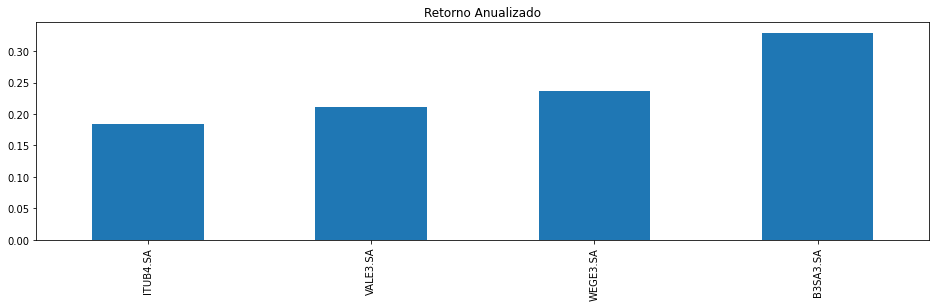

In [50]:
(r_monthly.mean() * 12).sort_values().plot(kind='bar', figsize=(16,4), title='Retorno Anualizado');

### Volatilidade anualizada

In [49]:
r_monthly.std() * np.sqrt(12)

B3SA3.SA    0.286615
ITUB4.SA    0.268246
VALE3.SA    0.445613
WEGE3.SA    0.234368
dtype: float64

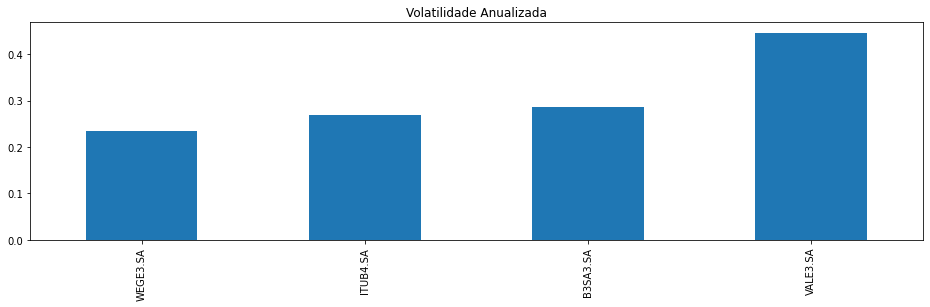

In [51]:
(r_monthly.std() * np.sqrt(12)).sort_values().plot(kind='bar', figsize=(16,4), title='Volatilidade Anualizada');